## Coding the Perceptron Forward Propagation

In [1]:
import numpy as np

In [2]:
def step(weighted_sum):
    """
    The step activation is applied to the perceptron output that
    returns 0 if the weighted sum is less than 0 and 1 otherwise 
    """
    if (weighted_sum) < 0:
        return 0
    return 1

In [3]:
def forward_propagation(input_data, weights, bias):
    """
    Computes the forward propagation operation of a perceptron 
    and return the output after applying the step activation function
    """
    weighted_sum = 0
    for i in range(len(input_data)):
        weighted_sum = weighted_sum + input_data[i]* weights[i]
    return step(weighted_sum + bias)

In [4]:
data = [2, 3, 0] # declaring two data points
weights = [2.0, 3.0] # weights of perceptron
bias = 0.1 # bias value
x = data[:2] # input values
actual_label = data[-1] # output label
print("Input data x: ", x)
print("Output label : ", actual_label)
predicted_label = forward_propagation(x, weights, bias) # predicted label
print("Predicted label:", predicted_label)

Input data x:  [2, 3]
Output label :  0
Predicted label: 1


In [5]:
def step_1(weighted_sum):
    return (weighted_sum > 0)* 1

In [6]:
def forward_propagation_1(input_data, weights, bias):
    return step_1(np.dot(input_data, weights) + bias)

In [7]:
X = np.array([2,3])
Y = np.array([0])
weights = np.array([2.0, 3.0])
bias = 0.1
Y_predicted = forward_propagation_1(X,weights.T, bias)
print("Input data X = ", X)
print("Output label Y = ", Y)
print("Predicted label: ", Y_predicted)

Input data X =  [2 3]
Output label Y =  [0]
Predicted label:  1


In [8]:
X = np.array([2,3])
Y = np.array([0])
weights_1 = np.array([1.0, -1.0])
bias = 0.1
Y_predicted = forward_propagation_1(X,weights.T, bias)
print("Input data X = ", X)
print("Output label Y = ", Y)
print("Predicted label: ", Y_predicted)

Input data X =  [2 3]
Output label Y =  [0]
Predicted label:  1


## Use the Sigmoid Activation Function

In [9]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [10]:
def forward_propagation_sigmoid(input_data, weights, bias):
    return sigmoid(np.dot(input_data, weights) + bias)

In [11]:
sigmoid_predicted_label = forward_propagation_sigmoid(X, weights.T, bias)
print("Input data X = ", X)
print("Output label Y = ", Y)
Y_predicted = (sigmoid_predicted_label > 0.5) *1
print("Predicted label using sigmoid activation function: ",Y_predicted)

Input data X =  [2 3]
Output label Y =  [0]
Predicted label using sigmoid activation function:  1


## The Error Function
* MSE:  $E =\dfrac{1}{2}(y - y^{'})$
* CE : $E = -y* \log(y^{'}) - (1-y)*\log(1-y^{'})$

In [12]:
def calculate_error(y, y_predicted):
    """Computes the binary cross entropy error"""
    return -y* np.log(y_predicted) - (1-y) * np.log(1- y_predicted)

In [13]:
X = np.array([2,3])
weights = np.array([2.0, 3.0])
Y = np.array([0])
Y_predicted = forward_propagation_sigmoid(X, weights.T, bias)
error = calculate_error(Y, Y_predicted)
print("Input data X = ", X)
print("Output label Y = ", Y)
print("Predicted label using sigmoid activation function: ",Y_predicted)
print("Error: ", error)

Input data X =  [2 3]
Output label Y =  [0]
Predicted label using sigmoid activation function:  0.9999979547735586
Error:  [13.10000205]


## Scaling Error Up to Multiple Data Points

In [14]:
X = np.array([[2,3], [1,4], [-1,-3], [-4,-5]])
Y = np.array([1.0, 1.0, 0.0, 0.0])
weights_0 = np.array([0.0, 0.0])
weights_1 = np.array([1.0, -1.0])
bias = 0.0

In [15]:
def ce_two_different_weights(X, Y, weights_0, weights_1, bias):
    sum_error_1 = 0
    sum_error_2 = 0
    for i in range(len(X)):
        Y_prediction_1 = forward_propagation_sigmoid(X[i], weights_0.T, bias)
        sum_error_1  = sum_error_1 +  calculate_error(Y[i], Y_prediction_1)
        Y_prediction_2 = forward_propagation_sigmoid(X[i], weights_1.T, bias)
        sum_error_2 = sum_error_2 +  calculate_error(Y[i], Y_prediction_2)
    return sum_error_1, sum_error_2
    

In [16]:
sum_error1, sum_error2 = ce_two_different_weights(X,Y, weights_0, weights_1, bias)

In [17]:
print("Sum error_1 = ",sum_error1, "\nSum error_2 = ", sum_error2 )

Sum error_1 =  2.772588722239781 
Sum error_2 =  7.802038737653159


In [18]:
for i in range(len(X)):
    print(i, X[i], weights_0.T)

0 [2 3] [0. 0.]
1 [1 4] [0. 0.]
2 [-1 -3] [0. 0.]
3 [-4 -5] [0. 0.]


In [19]:
sum_error_1 = 0
for i in range(len(X)):
    Y_prediction_1 = forward_propagation_sigmoid(X[i], weights_0.T, bias)
    sum_error_1 +=  calculate_error(Y[i], Y_prediction_1)
    print(" For i =", i, Y_prediction_1)
    print(sum_error_1)
    print("***************")
print("****************")
print(sum_error_1)

 For i = 0 0.5
0.6931471805599453
***************
 For i = 1 0.5
1.3862943611198906
***************
 For i = 2 0.5
2.0794415416798357
***************
 For i = 3 0.5
2.772588722239781
***************
****************
2.772588722239781


## Gradient Descent: The Stochastic Update

In [20]:
def gradient(target, actual, X):
    """Gradient of weights amd bias"""
    dW = -(target - actual)* X
    db = target - actual
    return dW, db

def update_parameters(W, b, dW, db, learning_rate):
    """Udating the weights and bias value"""
    W = W - dW * learning_rate
    b = b - db * learning_rate
    return W, b

def train_stoch(X, Y, weights, bias, epochs, learning_rate):
    """Training the perceptron using stochastic update"""
    sum_error = 0.0
    for j in range(epochs): # outer loop iterates epochs times
        for i in range(len(X)): # inner loop iterates lengh of X
            Y_predicted = forward_propagation_sigmoid(X[i], weights.T, bias)
            sum_error += calculate_error(Y[i], Y_predicted)
            dW, db = gradient(Y[i], Y_predicted, X[i])
            weights, bias = update_parameters(weights, bias, dW, db, learning_rate)
        print("Epochs: ", j, "error: ", sum_error)
        sum_error = 0 # re-intialize sum error at the end of each epoch
    return weights, bias

In [21]:
X = np.array([[2.78, 2.55], [1.46, 2.36], [3.39, 4.40], [1.38, 1.85], [3.06, 3.00],
              [7.62, 2.75], [5.33, 2.08], [6.92, 1.77], [8.67, -0.24], [7.67, 3.50]])

Y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # actual label
weights = np.array([0.0, 0.0]) # weights of perceptron
bias = 0.0 # bias value
learning_rate = 0.1 # learning rate
epochs = 10 # set epochs
print("Before training")
print("weights:", weights, "bias:", bias)

Before training
weights: [0. 0.] bias: 0.0


In [22]:
weights, bias = train_stoch(X, Y, weights, bias, epochs, learning_rate) # train the function

print("\nAfter training")
print("weights:", weights, "bias:", bias)

# Predict values
predicted_labels = forward_propagation_sigmoid(X, weights.T, bias)
print("Target labels:  ", Y)
print("Predicted label:", (predicted_labels > 0.5) * 1)

Epochs:  0 error:  5.679604226090772
Epochs:  1 error:  4.96759476005953
Epochs:  2 error:  3.695900221259798
Epochs:  3 error:  2.7732748505550413
Epochs:  4 error:  2.231288532231135
Epochs:  5 error:  1.8932337546645215
Epochs:  6 error:  1.6576875792330534
Epochs:  7 error:  1.4807754877217856
Epochs:  8 error:  1.3409460490775325
Epochs:  9 error:  1.226594549088747

After training
weights: [ 1.11386212 -1.82269816] bias: 0.7284723226201547
Target labels:   [0 0 0 0 0 1 1 1 1 1]
Predicted label: [0 0 0 0 0 1 1 1 1 1]


In [23]:
X.shape, Y.shape

((10, 2), (10,))

## Gradient Descent: The Batch Update

In [24]:
def calculate_error_batch(y, y_predicted):
    loss = np.sum(-y* np.log(y_predicted) - (1-y) * np.log(1- y_predicted))
    return loss

def gradient_batch(X, Y, Y_predicted):
    Error = Y_predicted - Y
    dW = np.dot(X.T, Error)
    db = np.sum(Error)
    return dW, db

def train_batch(X, Y, learning_rate, W, b, epochs, losses):
    """Training the perceptron using batch update"""
    for i in range(epochs): # loop over the total epochs
        Y_predicted = forward_propagation_sigmoid(X, W, b)
        losses[i,0] = calculate_error_batch(Y, Y_predicted) 
        dW, db = gradient_batch(X, Y, Y_predicted)
        W, b  = update_parameters(W, b, dW, db, learning_rate)
    return W, b, losses

In [25]:
X = np.array([[2.78, 2.55], [1.46, 2.36], [3.39, 4.40], [1.38, 1.85], [3.06, 3.00], [7.62, 2.75],
              [5.33, 2.08], [6.92, 1.77], [8.67, -0.24], [7.67, 3.50]])

Y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # actual label
weights = np.array([0.0, 0.0]) # weights of perceptron
bias = 0.0 # bias value
learning_rate = 0.01 # learning rate
epochs = 1000 # set epochs
losses = np.zeros((epochs, 1))
print("Before training")
print("weights:", weights, "bias:", bias)
print("Target labels: ", Y)

Before training
weights: [0. 0.] bias: 0.0
Target labels:  [0 0 0 0 0 1 1 1 1 1]


In [26]:
W, b, losses = train_batch(X, Y, learning_rate, weights, bias, epochs, losses)

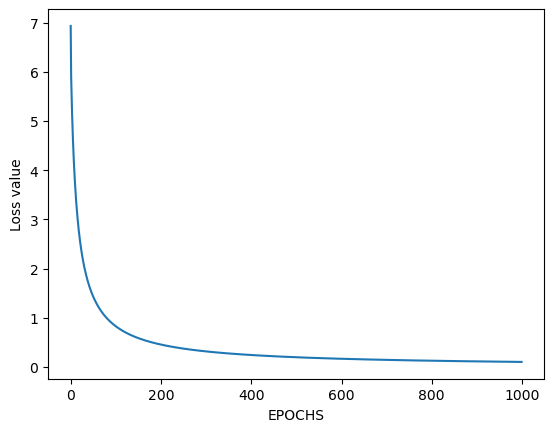

In [27]:
# Evaluating the performance
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(losses)
plt.xlabel('EPOCHS')
plt.ylabel("Loss value")
plt.show()


In [28]:
print("\nAfter training")
print("Weights: ", W, "bias: ", b)

# Predict value
A2 = forward_propagation_sigmoid(X, W, b)
pred = (A2 > 0.5)*1

print("Predicted labels: ", pred)
print("Target labes: ", Y)


After training
Weights:  [ 2.21307742 -3.23900781] bias:  -1.2433090808019682
Predicted labels:  [0 0 0 0 0 1 1 1 1 1]
Target labes:  [0 0 0 0 0 1 1 1 1 1]
